# <center> Script de analisis </center>

## Importacion de librerias

In [57]:
import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os

## Catalogo de sismos para entrenamiento

In [58]:
cat_directory = './data/lunar/training/catalogs/'
cat_file=cat_directory+'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)
cat

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19T20:25:00.000000,73500.0,evid00002,impact_mq
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25T03:32:00.000000,12720.0,evid00003,impact_mq
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26T20:17:00.000000,73020.0,evid00004,impact_mq
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25T01:14:00.000000,4440.0,evid00006,impact_mq
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26T14:29:00.000000,52140.0,evid00007,deep_mq
...,...,...,...,...,...
71,xa.s12.00.mhz.1974-10-14HR00_evid00156,1974-10-14T17:43:00.000000,63780.0,evid00156,impact_mq
72,xa.s12.00.mhz.1975-04-12HR00_evid00191,1975-04-12T18:15:00.000000,65700.0,evid00191,impact_mq
73,xa.s12.00.mhz.1975-05-04HR00_evid00192,1975-05-04T10:05:00.000000,36300.0,evid00192,impact_mq
74,xa.s12.00.mhz.1975-06-24HR00_evid00196,1975-06-24T16:03:00.000000,57780.0,evid00196,impact_mq


## Lectura de tiempos de arribo relativo

In [59]:
row = cat.iloc[0]
arrival_time = datetime.strptime(row['time_abs(%Y-%m-%dT%H:%M:%S.%f)'],'%Y-%m-%dT%H:%M:%S.%f')
arrival_time
# If we want the value of relative time, we don't need to use datetime
arrival_time_rel = row['time_rel(sec)']
arrival_time_rel

73500.0

## Descripcion de datos

In [60]:
csv_file = './data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-07-20HR00_evid00011.csv'
data_cat = pd.read_csv(csv_file)
data_cat.describe()

,time_rel(sec),velocity(m/s)
count,572411.000000,5.724110e+05
mean,43200.754717,-5.624328e-13
std,24942.032725,7.318489e-10
min,0.000000,-2.022016e-08
25%,21600.377358,-1.248466e-10
50%,43200.754717,-2.497256e-13
75%,64801.132075,1.182554e-10
max,86401.509434,1.964506e-08


## Lectura del frame como serie de tiempo

In [61]:
luna=pd.read_csv(csv_file,index_col=0,parse_dates=True)
luna

,time_rel(sec),velocity(m/s)
time_abs(%Y-%m-%dT%H:%M:%S.%f),,
1970-07-20 00:00:00.487000,0.000000,-1.462155e-15
1970-07-20 00:00:00.637943,0.150943,-1.824771e-15
1970-07-20 00:00:00.788887,0.301887,-1.974266e-15
1970-07-20 00:00:00.939830,0.452830,-1.886487e-15
1970-07-20 00:00:01.090774,0.603774,-1.646714e-15
...,...,...
1970-07-21 00:00:01.392660,86400.905660,-3.375389e-16
1970-07-21 00:00:01.543604,86401.056604,-4.551111e-16
1970-07-21 00:00:01.694547,86401.207547,-5.143100e-16


## Cambio de muestreo de la serie de tiempo (5 mediciones por segundo a 1 segundo por medicion)

In [62]:
seg=luna.resample('s').mean()
seg

,time_rel(sec),velocity(m/s)
time_abs(%Y-%m-%dT%H:%M:%S.%f),,
1970-07-20 00:00:00,0.226415,-1.786920e-15
1970-07-20 00:00:01,1.056604,-9.123013e-16
1970-07-20 00:00:02,2.037736,4.416532e-16
1970-07-20 00:00:03,3.018868,7.001884e-16
1970-07-20 00:00:04,4.000000,1.291406e-16
...,...,...
1970-07-20 23:59:57,86396.981132,-5.387787e-16
1970-07-20 23:59:58,86398.037736,-6.445551e-16
1970-07-20 23:59:59,86399.018868,5.491000e-16


## Graficacion del sismograma 

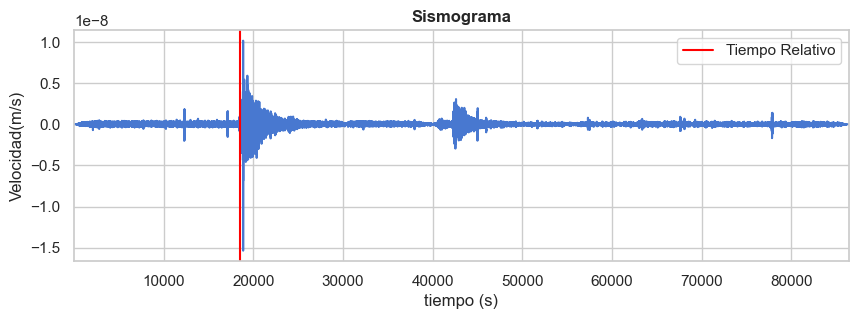

In [63]:
# Lectura de velocidades
csv_times = np.array(seg['time_rel(sec)'].tolist())
csv_data = np.array(seg['velocity(m/s)'].tolist())
# Graficacion
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(csv_times,csv_data)
# elementos de la grafica
ax.grid(True)
ax.set_xlim([min(csv_times),max(csv_times)])
ax.set_ylabel('Velocidad(m/s)')
ax.set_xlabel('tiempo (s)')
ax.set_title("Sismograma", fontweight='bold')
# Plot where the arrival time is
arrival_line = ax.axvline(x=18500, c='red', label='Tiempo Relativo')
ax.legend(handles=[arrival_line])

## <center> Analisis mediante frecuencia de la señal </center>

## Lectura de datos de sismografo

In [64]:
mseed_archivo ='./data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1970-07-20HR00_evid00011.mseed'
frame_sismo=read(mseed_archivo)
frame_sismo

1 Trace(s) in Stream:
XA.S12.00.MHZ | 1970-07-20T00:00:00.487000Z - 1970-07-21T00:00:01.996434Z | 6.6 Hz, 572411 samples

In [65]:
frame_sismo[0].stats

         network: XA
         station: S12
        location: 00
         channel: MHZ
       starttime: 1970-07-20T00:00:00.487000Z
         endtime: 1970-07-21T00:00:01.996434Z
   sampling_rate: 6.625
           delta: 0.1509433962264151
            npts: 572411
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 1136, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 4096, 'filesize': 4653056})

In [66]:
# This is how you get the data and the time, which is in seconds
tr = frame_sismo.traces[0].copy()
tr_times = tr.times()
tr_data = tr.data

# Start time of trace (another way to get the relative arrival time using datetime)
starttime = tr.stats.starttime.datetime
arrival = (arrival_time - starttime).total_seconds()
arrival

-15651300.487

Text(0.5, 1.0, 'sismograma')

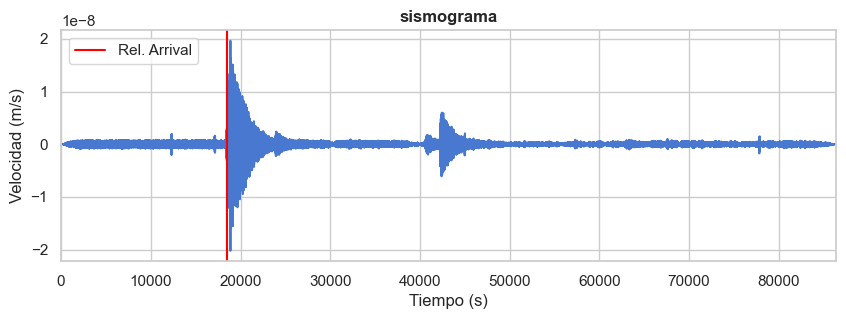

In [67]:
# Initialize figure
fig,ax = plt.subplots(1,1,figsize=(10,3))
# Plot trace
ax.plot(tr_times,tr_data)
# Mark detection
ax.axvline(x = 18500, color='red',label='Rel. Arrival')
ax.legend(loc='upper left')
# Make the plot pretty
ax.set_xlim([min(tr_times),max(tr_times)])
ax.set_ylabel('Velocidad (m/s)')
ax.set_xlabel('Tiempo (s)')
ax.set_title("sismograma", fontweight='bold')

## Filtro por Frecuencia pasa banda (0.01 Hz a 0.5 Hz)

In [68]:
# Configurando las frecuencias criticas del filtro
minfreq = 0.5
maxfreq = 1.0
# Creando una grafica distinta para el manejo de los datos 
st_filt = frame_sismo.copy()
st_filt.filter('bandpass',freqmin=minfreq,freqmax=maxfreq)
tr_filt = st_filt.traces[0].copy()
tr_times_filt = tr_filt.times()
tr_data_filt = tr_filt.data

In [69]:
# para mejorar la visualizacion de los datos, estos pueden un espectograma de la funcion de scipy
# Requiere la frecuencia de muestreo, que podemos obtener del encabezado miniseed como se muestra en algunas celdas arriba.
from scipy import signal
from matplotlib import cm
f, t, sxx = signal.spectrogram(tr_data_filt, tr_filt.stats.sampling_rate)

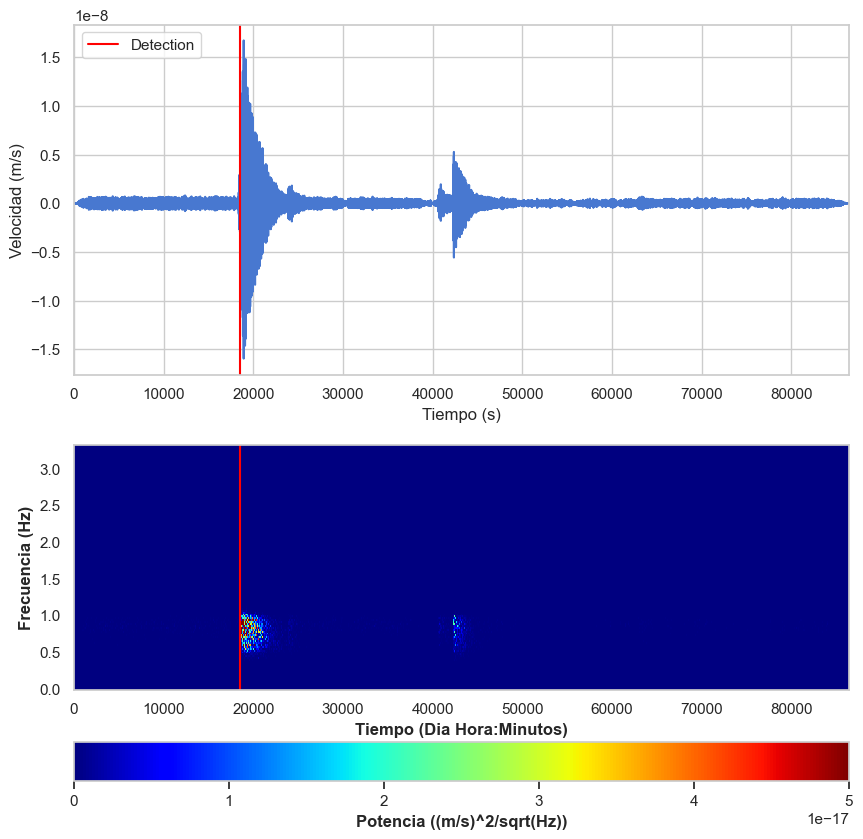

In [70]:
# Graficar la serie temporal y el espectrograma
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(2, 1, 1)
# Traza de la grafica
ax.plot(tr_times_filt,tr_data_filt)
# Marca de deteccion 
ax.grid(True)
ax.axvline(x = 18500, color='red',label='Detection')
ax.legend(loc='upper left')
# Mejorando la grafica
ax.set_xlim([min(tr_times_filt),max(tr_times_filt)])
ax.set_ylabel('Velocidad (m/s)')
ax.set_xlabel('Tiempo (s)')
ax2 = plt.subplot(2, 1, 2)
vals = ax2.pcolormesh(t, f, sxx, cmap=cm.jet, vmax=5e-17)
ax2.set_xlim([min(tr_times_filt),max(tr_times_filt)])
ax2.set_xlabel(f'Tiempo (Dia Hora:Minutos)', fontweight='bold')
ax2.set_ylabel('Frecuencia (Hz)', fontweight='bold')
ax2.axvline(x=18500, c='red')
cbar = plt.colorbar(vals, orientation='horizontal')
cbar.set_label('Potencia ((m/s)^2/sqrt(Hz))', fontweight='bold')

# <center> Analisis para entrenamiento </center>

## Graficacion de residuales de tiempo y velocidad a partir de la media

<Axes: >

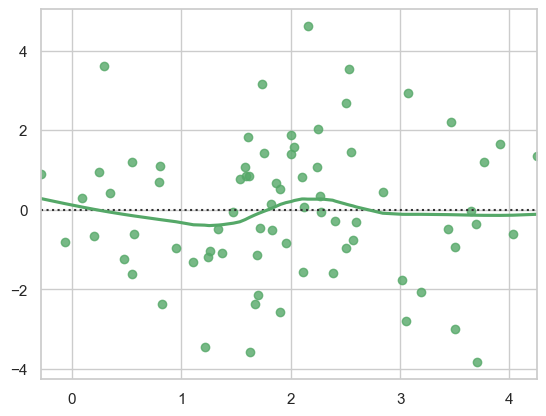

In [71]:
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

# Valores de frecuencia contra velocidad
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Comparacion de modelo elemental y residuales
sns.residplot(x=x, y=y, lowess=True, color="g")

In [72]:
import pandas as pd
import seaborn as sns
sns.set_theme()

## Graficacion de datos de sismo mediante dispersion

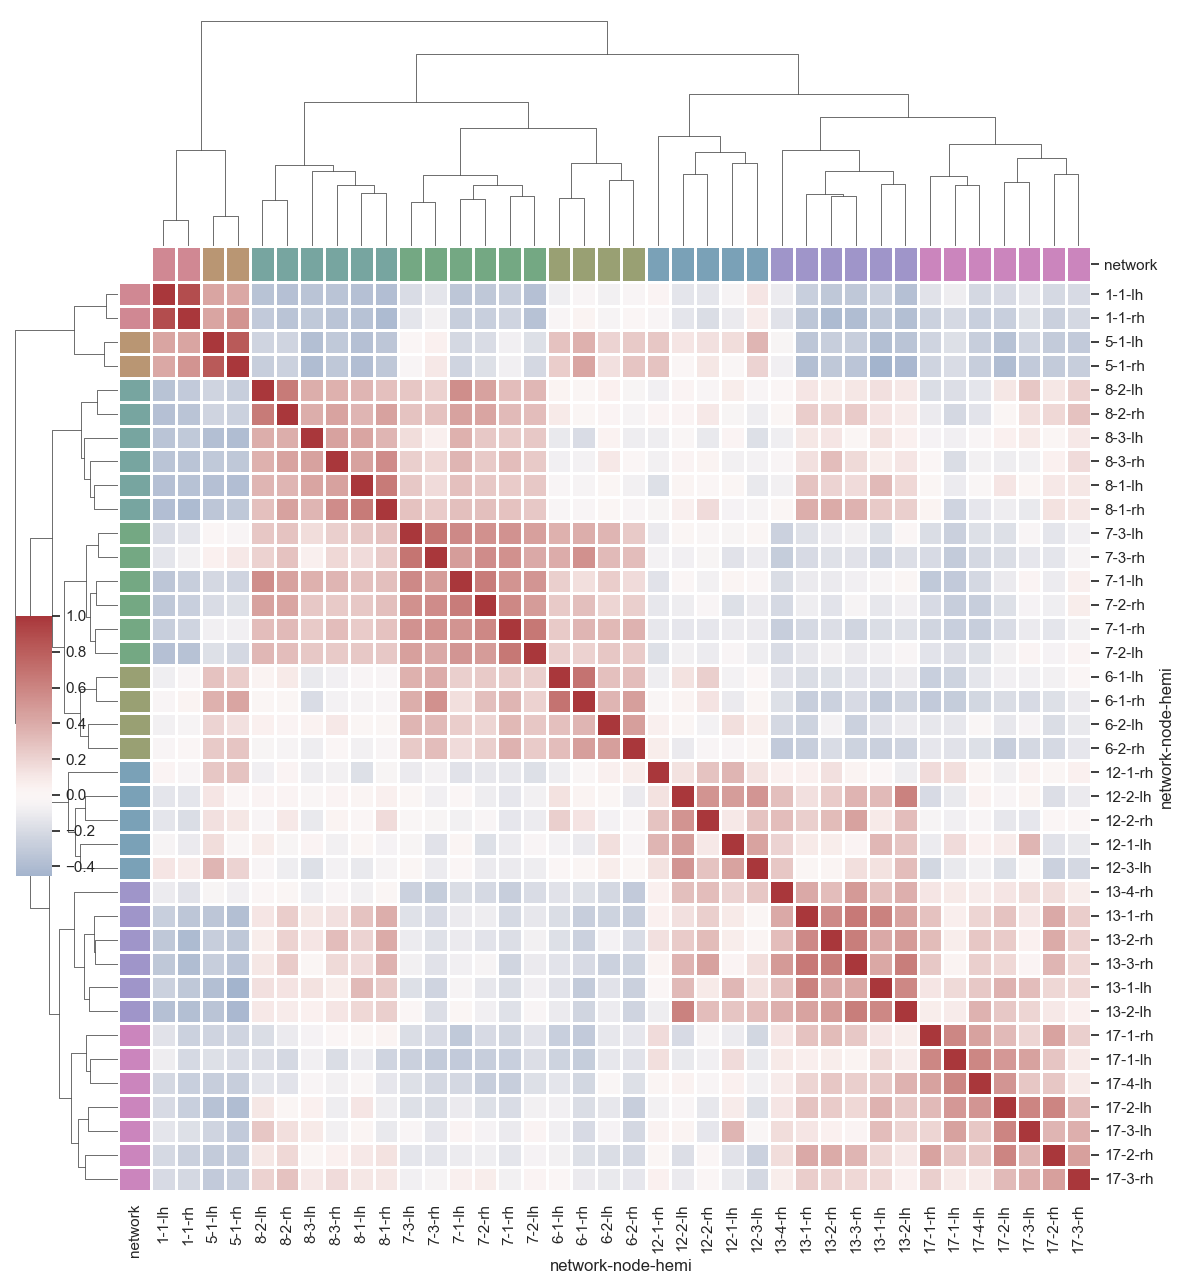

In [73]:
# carga del dataset
df=pd.read_csv("datos_sismo_procesados.csv", header=[0, 1, 2], index_col=0)

# Seleccion de variables del frame
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# identificacion categorica
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Generacion de vector de valores
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# graficacion de cluster de variables
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

## Categorizacion de sismos

[Text(8.250000000000002, 0.5, '')]

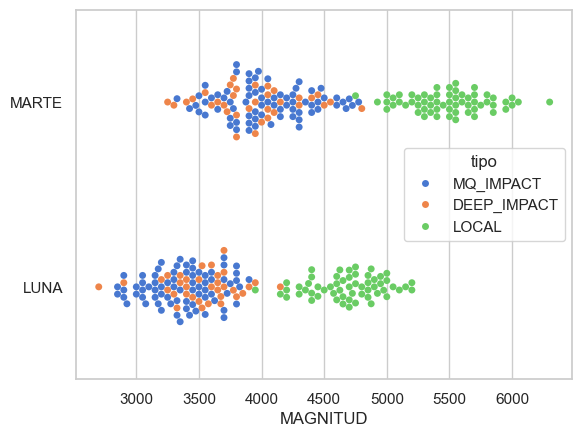

In [74]:
sns.set_theme(style="whitegrid", palette="muted")

# carga del dataset
df2 =pd.read_csv("categorias_sismos.csv")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df2, x="MAGNITUD", y="lugar", hue="tipo")
ax.set(ylabel="")